In [22]:
import gurobipy
import pandas as pd
from oct import *
import numpy as np
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


In [23]:

## Create artificial data set with
n = 400
x1 = np.random.normal(loc = 0,scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
x4 = np.random.normal(loc=0, scale=1, size=n)
x5 = np.random.normal(loc = 0,scale=1, size=n)
x6 = np.random.normal(loc=0, scale=1, size=n)
x7 = np.random.normal(loc=0, scale=1, size=n)
x8 = np.random.normal(loc=0, scale=1, size=n)

y = (x2 < 0.5) 

# + (x1 < 0.5) * (x5 < 0.7) + 

y_bar = y
# +np.random.normal(0, 0.1, size = n)
# (x2 < -0.1) * (x3 > -0.5)* (x4 < -1) + (x1 < 0.5) * (x5 < 0.7)* (x6 > -0.8)* (x8 > -0.5)

y = y_bar

simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8,
                                'y': y, 'y_bar': y_bar})

X = simulated_data[[f'x{i}' for i in range(1, 9)]]
y = np.array(simulated_data['y'])
orig_cols = simulated_data.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# scales = np.max(X, axis=0)
# scales[scales == 0] = 1
# X_train = X_train/scales
# X_test = X_test/scales

In [24]:
ORFA = optimalDecisionTreeClassifier(max_depth=2, 
                                     output = False,
                                     warmstart = True,
                                     alpha = 0.5)

In [25]:
X_train.shape

(320, 8)

In [26]:
t0 = time.time()
# ORFA.fit(X_train, y_train, scaled = True)
ORFA.fit(X_train, y_train)
t1 = time.time()
total = t1-t0
print(total)

/Users/ryanlucas/Downloads/An-Optimal-RuleFit-Algorithm-main/IORFA/oct.py:203: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(y)[0][0]


[-0.23342531 -0.60636506  0.02558379 -0.08870043  0.28927539 -0.02078331
  0.46627481  0.09649086  0.12600097  0.40777228 -0.30522617 -0.00373367
 -0.23761508  0.14992388  0.40373022 -0.08817593 -0.07904912  0.41413857
  0.01479856 -0.30140039 -0.29508217 -0.24904044  0.00671853  0.28135219
 -0.06964109  0.00741755  0.20496157  0.07440833  0.23513644 -0.3352353
  0.37687523  0.33983766  0.1035409  -0.11157954  0.04507059  0.25043619
  0.75078981 -0.20456144  0.29159869  0.22387113 -0.02316448 -0.32017877
  0.33390783  0.087101   -0.17547103  0.27303556 -0.20943062  0.49454106
  0.37860492 -0.2829882  -0.27987715  0.48578252  0.34928541 -0.17555759
 -0.22708949  0.22543809  0.46554726 -0.39980402 -0.3711215   0.297133
  0.22375753  0.335381    0.01192102 -0.12494623  0.23626895  0.25754755
 -0.61900087 -0.11849508 -0.35978455  0.56379761 -0.26261377  0.22200787
 -0.0279756   0.42047528  0.08810569 -0.02517163  0.44418143 -0.01478952
 -0.18737687 -0.40050413  0.18670993 -0.15878867  0.24

In [27]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 1): -0.0,
 (3, 2): 1.0,
 (3, 3): -0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (5, 1): 1.0,
 (5, 2): -0.0,
 (5, 3): 1.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): -0.0,
 (7, 2): -0.0,
 (7, 3): -0.0}

In [28]:
def find_rules_from_node_x(x, odt):

    # Find the active splits (those that are actually used) at the first node
    active_splits_at_node_x =  {i: odt._a[i] for i in list(odt._a.keys()) if (i[1] == x and odt._a[i] == 1)}

    # Store the splitting variable and the threshold together
    for key in list(active_splits_at_node_x.keys()):
        active_splits_at_node_x[(key[0], odt._b[x])] = active_splits_at_node_x[key]
        del active_splits_at_node_x[key]

    # Make rules out of them
    rules_from_node_x = {(f"np.array(X[:, {key[0]}]) <= " + str(key[1]), 
                        f"np.array(X[:, {key[0]}]) > " + str(key[1]) )           
                        for key in active_splits_at_node_x.keys()}
    
    return rules_from_node_x

def chain_rules(odt):
    
    rules_N1 = list(find_rules_from_node_x(1, odt))[0]
    rules_N2 = list(find_rules_from_node_x(2, odt))[0]
    rules_N3 = list(find_rules_from_node_x(3, odt))[0]

    path1 = "(" + rules_N1[0] + ")" + " * " + "(" + (rules_N2[0]) + ")"
    path2 = "(" +(rules_N1[0])+ ")" + " * " + "(" + (rules_N2[1]) + ")"
    path3 = "(" +(rules_N1[1]) + ")" + " * " +  "(" +(rules_N3[0]) + ")"
    path4 = "(" +(rules_N1[1]) + ")" + " * " + "(" +(rules_N3[1]) + ")"


    return [path1, path2, path3, path4]


def add_rules_to_df(rules, X):

    X = np.matrix(X)

    for rule in rules:
        rule_ind = []

        for k in range(X.shape[0]):
            if k in np.where(np.array(eval(rule)).flatten())[0]:
                rule_ind.append(1)
            else:
                rule_ind.append(0)
    
        X = np.hstack((X, np.array(rule_ind).reshape(-1,1)))
    
    return X

def IORFA(X, odt):
    rules = chain_rules(odt)

    betas = [odt.beta[i] for i in list(odt.beta.keys())]
    gammas = [odt.gamma[i] for i in list(odt.gamma.keys())]
    coefficients = betas + gammas
    rule_df = np.matrix(add_rules_to_df(rules, X))

    preds = []
    for i in range(X.shape[0]):
        print(rule_df.shape)

        y_i = sum(rule_df[i, j]*coefficients[j] for j in range(len(coefficients)))
        preds.append(y_i)
    
    return preds, rule_df, coefficients, rules

In [29]:
np.array(dir(ORFA))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_a', '_b', '_buildMIP', '_c', '_calBaseline',
       '_calMinDist', '_d', '_getRules', '_setStart', 'alpha', 'b_index',
       'beta', 'fit', 'gamma', 'l_index', 'labels', 'max_depth',
       'min_samples_split', 'n', 'n_index', 'optgap', 'output', 'p',
       'predict', 'scales', 'timelimit', 'trained', 'warmstart'],
      dtype='<U17')

In [30]:
y_train_pred, rule_df, coefs, rules = IORFA(X_train, ORFA)

(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)
(320, 12)


In [31]:
rules

['(np.array(X[:, 5]) <= 0.06642729069006362) * (np.array(X[:, 3]) <= 0.04964122980441295)',
 '(np.array(X[:, 5]) <= 0.06642729069006362) * (np.array(X[:, 3]) > 0.04964122980441295)',
 '(np.array(X[:, 5]) > 0.06642729069006362) * (np.array(X[:, 5]) <= 0.07398899592490595)',
 '(np.array(X[:, 5]) > 0.06642729069006362) * (np.array(X[:, 5]) > 0.07398899592490595)']

In [32]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8
336,-0.670114,-1.924034,-0.032627,-0.911963,0.493210,-0.187396,0.261302,0.338171
64,-1.740743,1.108860,-0.529311,0.037768,0.536344,0.335976,1.488303,0.770608
55,0.073446,0.002766,-1.004406,-0.920161,1.629152,-0.825410,-0.597284,-1.774208
106,-0.254640,1.107555,-0.208821,0.198851,-0.819179,0.174050,-0.849568,0.187326
300,0.830447,-0.699509,0.912206,0.262103,-0.474567,0.439771,-0.708314,0.159454
...,...,...,...,...,...,...,...,...
323,0.956202,-0.967376,0.622213,0.307220,1.127973,-0.596357,-1.622660,1.422169
192,1.722862,-3.512225,-2.301464,1.338572,-1.117436,-0.691721,0.162175,-0.878176
117,-0.886961,0.280326,-1.401341,0.161315,0.851425,0.837671,0.928824,-0.334043
47,0.285698,-0.881146,0.458183,1.277937,0.573905,0.471775,0.628074,-2.276215


In [33]:
pd.DataFrame(rule_df)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.670114,-1.924034,-0.032627,-0.911963,0.493210,-0.187396,0.261302,0.338171,1.0,0.0,0.0,0.0
1,-1.740743,1.108860,-0.529311,0.037768,0.536344,0.335976,1.488303,0.770608,0.0,0.0,0.0,1.0
2,0.073446,0.002766,-1.004406,-0.920161,1.629152,-0.825410,-0.597284,-1.774208,1.0,0.0,0.0,0.0
3,-0.254640,1.107555,-0.208821,0.198851,-0.819179,0.174050,-0.849568,0.187326,0.0,0.0,0.0,1.0
4,0.830447,-0.699509,0.912206,0.262103,-0.474567,0.439771,-0.708314,0.159454,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.956202,-0.967376,0.622213,0.307220,1.127973,-0.596357,-1.622660,1.422169,0.0,1.0,0.0,0.0
316,1.722862,-3.512225,-2.301464,1.338572,-1.117436,-0.691721,0.162175,-0.878176,0.0,1.0,0.0,0.0
317,-0.886961,0.280326,-1.401341,0.161315,0.851425,0.837671,0.928824,-0.334043,0.0,0.0,0.0,1.0
318,0.285698,-0.881146,0.458183,1.277937,0.573905,0.471775,0.628074,-2.276215,0.0,0.0,0.0,1.0


In [34]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 1): -0.0,
 (3, 2): 1.0,
 (3, 3): -0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (5, 1): 1.0,
 (5, 2): -0.0,
 (5, 3): 1.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): -0.0,
 (7, 2): -0.0,
 (7, 3): -0.0}

In [35]:
pd.DataFrame(rules).values

array([['(np.array(X[:, 5]) <= 0.06642729069006362) * (np.array(X[:, 3]) <= 0.04964122980441295)'],
       ['(np.array(X[:, 5]) <= 0.06642729069006362) * (np.array(X[:, 3]) > 0.04964122980441295)'],
       ['(np.array(X[:, 5]) > 0.06642729069006362) * (np.array(X[:, 5]) <= 0.07398899592490595)'],
       ['(np.array(X[:, 5]) > 0.06642729069006362) * (np.array(X[:, 5]) > 0.07398899592490595)']],
      dtype=object)

In [36]:

print("IN-SAMPLE")
print(r2_score(y_train_pred, y_train))
print("OO-SAMPLE")
y_test_pred, rule_df, coefs, rules = IORFA(X_test, ORFA)
r2_score(y_test_pred, y_test)

IN-SAMPLE
-7.1693615664742705
OO-SAMPLE
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)


-7.765800376383831

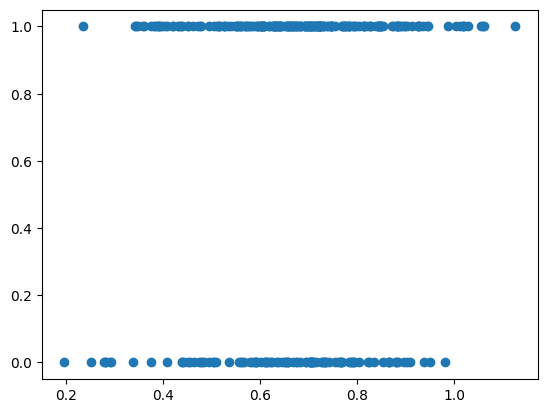

In [37]:
plt.scatter(y_train_pred, y_train)